In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns; sns.set()
import plotly.express as px
import networkx as nx

In [ ]:
layover = pd.read_csv('/content/data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,2,3,6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
layover = layover.dropna(subset=['Covid cases'])
print(layover)

                 City IATA Unique Corresponding city Airline Airline ID  \
0              Goroka  GKA    AAE             Annaba      2B        410   
1              Madang  MAG    AAL            Aalborg      2B        410   
2         Mount Hagen  HGU    AAN             Al Ain      2B        410   
3              Nadzab  LAE    AAQ              Anapa      2B        410   
4        Port Moresby  POM    AAR             Aarhus      2B        410   
...               ...  ...    ...                ...     ...        ...   
3413  Ciudad del Este  AGT    ZUH                NaN      9C      15999   
3414       Georgetown  OGL    ZUM                NaN      9C      15999   
3415         Kaieteur  KAI    ZVK                NaN      9C      15999   
3416         Dunhuang  DNH    ZYI                NaN      9C      15999   
3417           Ancona  AOI    ZYL                NaN      9C      15999   

     Source airport Source airport ID Destination airport  \
0               AER              2965 

In [ ]:
px.histogram(layover, y='Covid cases',  title='Covid cases in each city')

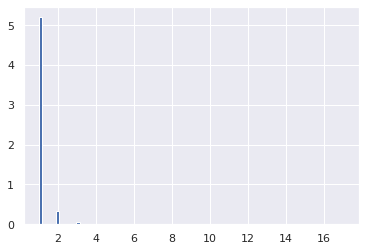

In [ ]:
z = np.random.zipf(4, 10000)
plt.hist(z, bins = 90, density = True)
plt.show()

In [ ]:
g = nx.Graph()
nodes= [row["Source airport"] for item, row in layover.iterrows()]
g.add_nodes_from(nodes)

In [ ]:
frequency = {}
for item in nodes:
   if item in frequency:
      frequency[item] += 1
   else:
      frequency[item] = 1


print(frequency)

{'AER': 1, 'ASF': 1, 'CEK': 1, 'DME': 1, 'EGO': 1, 'GYD': 1, 'KGD': 1, 'KZN': 1, 'LED': 1, 'MRV': 1, 'NBC': 1, 'NJC': 1, 'NUX': 1, 'OVB': 1, 'SVX': 1, 'TGK': 1, 'UUA': 1, 'BTK': 1, 'HTA': 1, 'IKT': 1, 'KCK': 1, 'MJZ': 1, 'ODO': 1, 'UKX': 1, 'ULK': 1, 'YKS': 1, 'AYP': 1, 'CUZ': 1, 'HUU': 1, 'IQT': 1, 'LIM': 1, 'PCL': 1, 'PEM': 1, 'TPP': 1, 'ABJ': 1, 'ACC': 1, 'BKO': 1, 'BOY': 1, 'COO': 1, 'DKR': 1, 'LFW': 1, 'NIM': 1, 'OUA': 1, 'BOG': 1, 'CLO': 1, 'GYE': 1, 'OCC': 1, 'SCY': 1, 'UIO': 1, 'BDS': 1, 'BOD': 1, 'BRS': 1, 'GVA': 1, 'LCA': 1, 'LPA': 1, 'RMF': 1, 'TFS': 1, 'ZRH': 1, 'AJR': 1, 'ARN': 1, 'GEV': 1, 'HAD': 1, 'HMV': 1, 'JKG': 1, 'KOK': 1, 'KRF': 1, 'KSD': 1, 'LYC': 1, 'MHQ': 1, 'OER': 1, 'OSL': 1, 'POR': 1, 'TKU': 1, 'TRF': 1, 'VBY': 1, 'VHM': 1, 'VXO': 1, 'ADQ': 1, 'AOS': 1, 'KKB': 1, 'KLN': 1, 'KOZ': 1, 'SYB': 1, 'BSO': 1, 'BXU': 1, 'CBO': 1, 'CGY': 1, 'CRM': 1, 'DGT': 1, 'DWC': 1, 'GES': 1, 'KLO': 1, 'LGP': 1, 'MNL': 1, 'MPH': 1, 'OZC': 1, 'PPS': 1, 'RXS': 1, 'SUG': 1, 'TUG': 1,

Text(0.5, 1.0, 'Top 500 places with maximum cases')

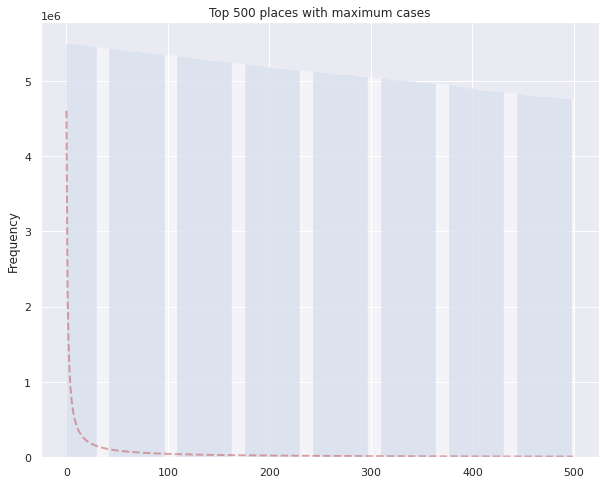

In [ ]:
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [layover.sort_values(by='Covid cases', ascending=False)['Covid cases'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, layover.sort_values(by='Covid cases', ascending=False)['Covid cases'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 places with maximum cases')

In [ ]:
!pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


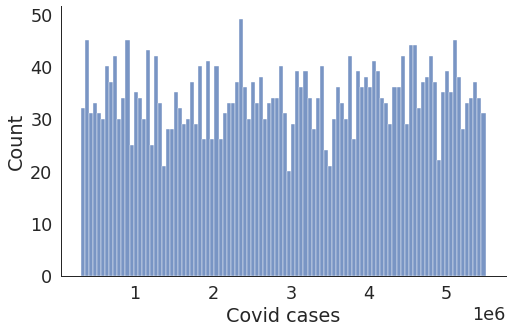

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=layover, x="Covid cases", kind="hist", bins = 100, aspect = 1.5)

In [ ]:
cases = layover["Covid cases"].values

,sumsquare_error,aic,bic,kl_div
beta,1.073067e-13,3100.660765,-129851.097553,0.015250
norm,6.228416e-13,3131.932695,-123856.473017,0.099254
gamma,6.236338e-13,3133.933045,-123843.991071,0.099368
burr,1.417273e-12,3194.095831,-121029.928033,0.251114
lognorm,3.720470e-12,3718.787059,-117739.300163,1.530711


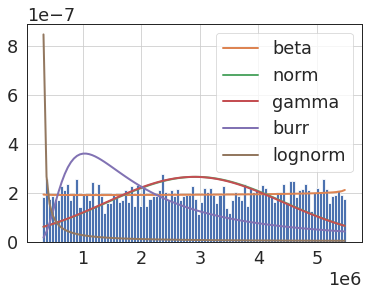

In [ ]:
f = Fitter(cases,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [ ]:
f.get_best(method = 'sumsquare_error')

{'beta': {'a': 0.996107985032563,
  'b': 0.9783723137135536,
  'loc': 305333.7247727476,
  'scale': 5194055.275239864}}

In [ ]:
f.fitted_param["beta"]

(0.996107985032563, 0.9783723137135536, 305333.7247727476, 5194055.275239864)

In [ ]:
!pip install distfit
from distfit import distfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
dist = distfit()
dist.fit_transform(cases)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 2.8517e-13] [loc=2930637.130 scale=1510813.308]
[distfit] >[expon     ] [0.00 sec] [RSS: 5.07186e-13] [loc=305488.000 scale=2625149.130]
[distfit] >[pareto    ] [0.44 sec] [RSS: 2.71355e-12] [loc=-4.132 scale=305492.132]
[distfit] >[dweibull  ] [0.29 sec] [RSS: 2.7724e-13] [loc=2969034.240 scale=1453468.672]
[distfit] >[t         ] [0.21 sec] [RSS: 7.16083e-13] [loc=-11205.017 scale=3302048.742]
[distfit] >[genextreme] [0.40 sec] [RSS: 2.49963e-13] [loc=2545812.941 scale=1620270.063]
[distfit] >[gamma     ] [0.34 sec] [RSS: 2.85567e-13] [loc=-83054073.593 scale=26570.496]
[distfit] >[lognorm   ] [0.69 sec] [RSS: 1.64952e-12] [loc=305488.000 scale=0.970]
[distfit] >[beta      ] [0.69 sec] [RSS: 2.67909e-14] [loc=305333.725 scale=5194055.275]
[distfit] >[uniform   ] [0.00 sec] [RSS: 2.7268e-14] [loc=305488.000 scale=5193901.000]
[distfit] >[loggamma  ] [0.28 sec] [RSS: 2.84368e-13] [loc=-68243117.187 scale=1

{'alpha': 0.05,
 'bins': 50,
 'bound': 'both',
 'distr': 'popular',
 'f': 1.5,
 'histdata': (array([2.16867765e-07, 1.80253727e-07, 1.71804333e-07, 2.16867765e-07,
         2.02785443e-07, 2.22500694e-07, 1.68987869e-07, 1.80253727e-07,
         1.91519585e-07, 2.11234836e-07, 1.38006760e-07, 1.77437262e-07,
         1.71804333e-07, 1.88703120e-07, 1.94336049e-07, 1.88703120e-07,
         1.85886656e-07, 1.60538475e-07, 1.85886656e-07, 2.42215945e-07,
         1.85886656e-07, 1.97152514e-07, 1.91519585e-07, 1.88703120e-07,
         2.08418372e-07, 1.43639689e-07, 1.91519585e-07, 2.11234836e-07,
         1.74620798e-07, 2.08418372e-07, 1.26740902e-07, 1.85886656e-07,
         1.77437262e-07, 1.91519585e-07, 2.11234836e-07, 2.08418372e-07,
         2.25317158e-07, 1.88703120e-07, 1.83070191e-07, 2.19684229e-07,
         2.05601907e-07, 2.14051301e-07, 2.11234836e-07, 2.22500694e-07,
         1.60538475e-07, 2.08418372e-07, 2.33766552e-07, 1.71804333e-07,
         1.99968978e-07, 1.830701

In [ ]:
print(dist.summary)

         distr score  LLE              loc            scale  \
0         beta   0.0  NaN    305333.724773    5194055.27524   
1      uniform   0.0  NaN         305488.0        5193901.0   
2   genextreme   0.0  NaN   2545812.940915   1620270.063495   
3     dweibull   0.0  NaN   2969034.240107   1453468.672485   
4     loggamma   0.0  NaN -68243117.187193  15351812.695344   
5         norm   0.0  NaN   2930637.130193   1510813.308075   
6        gamma   0.0  NaN -83054073.592831     26570.496045   
7        expon   0.0  NaN         305488.0   2625149.130193   
8            t   0.0  NaN    -11205.016991   3302048.741988   
9      lognorm   0.0  NaN         305488.0         0.969917   
10      pareto   0.0  NaN         -4.13174    305492.131697   

                                        arg  
0   (0.996107985032563, 0.9783723137135536)  
1                                        ()  
2                     (0.4809585261816133,)  
3                     (1.6626311371871862,)  
4            

[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4225f6a650>)

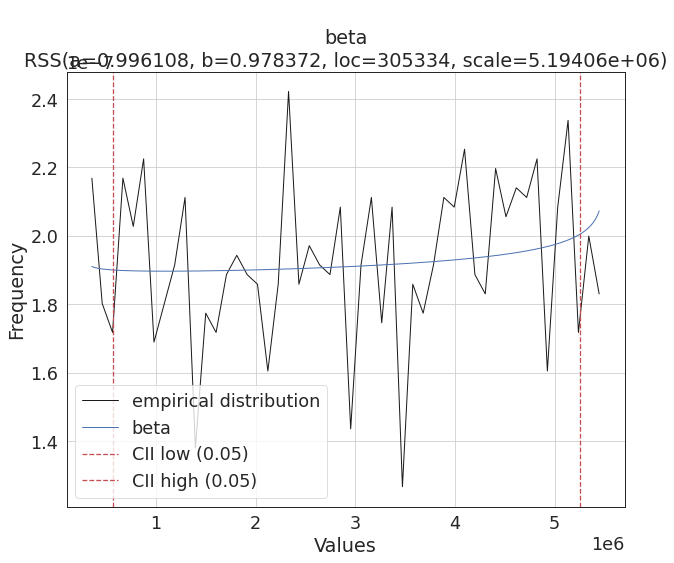

In [ ]:
dist.plot()